In [11]:
%cd /content/drive/MyDrive/avail-attacks

/content/drive/MyDrive/avail-attacks


In [15]:
import os
import glob
import pandas as pd

folder = "untargeted_results"

directory = '/content/drive/MyDrive/avail-attacks/' + folder
os.chdir(directory)

csv_files = sorted(glob.glob('*.csv'))

dfs = list()
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)
print(len(dfs))

88


In [16]:
before_folder = "untargeted_0-002_0-003"

directory = '/content/drive/MyDrive/avail-attacks/' + folder + "/" + before_folder
os.chdir(directory)

csv_files = sorted(glob.glob('*.csv'))

before_folder = list()
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    before_folder.append(df)
print(len(before_folder))
dfs = before_folder + dfs

22


In [17]:
after_folder = "untargeted_0-012_0-014"

directory = '/content/drive/MyDrive/avail-attacks/' + folder + "/" + after_folder
os.chdir(directory)

csv_files = sorted(glob.glob('*.csv'))

after_folder = list()
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    after_folder.append(df)
print(len(after_folder))
dfs = dfs + after_folder

44


In [18]:
import numpy as np

lower_bound = 0.002
upper_bound = 0.015
number_of_fractions = 14
number_of_tests_per_fractions = 11

fractions = np.linspace(lower_bound, upper_bound, number_of_fractions)

accuracys = np.zeros((number_of_fractions, number_of_tests_per_fractions))

for i in range(number_of_fractions):
  for j in range(number_of_tests_per_fractions):
    accuracy = dfs[i * number_of_tests_per_fractions + j]["test_acc"].values
    accuracys[i,j] = accuracy[-1:].mean()

median_array = np.median(accuracys, axis=1)
min_array = accuracys.min(axis=1)
max_array = accuracys.max(axis=1)

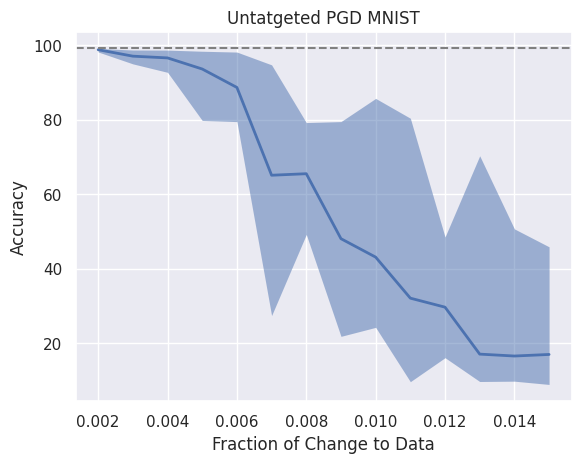

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

name = "Untatgeted PGD MNIST"
horizontal_line = 99.3

fig, ax = plt.subplots()
ax.fill_between(fractions, min_array, max_array, alpha=0.5, linewidth=0)
ax.plot(fractions, median_array, linewidth=2)

plt.axhline(y=horizontal_line, color='gray', linestyle='--')

ax.set_xlabel("Fraction of Change to Data")
ax.set_ylabel("Accuracy")
ax.set_title(name)
plt.savefig(name + ".png")
plt.show()